In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [3]:
img = cv2.imread('color_extraction.jpeg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [4]:
img.shape

(168, 299, 3)

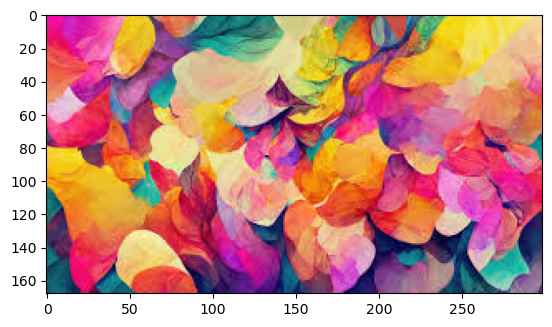

In [5]:
plt.imshow(img)
plt.show()

In [9]:
# X = img.reshape((-1,3))

In [10]:
# X.shape # this image is very large so i'll make it one-fourth

In [11]:
img = cv2.resize(img,(353,530))

In [16]:
img.shape

(530, 353, 3)

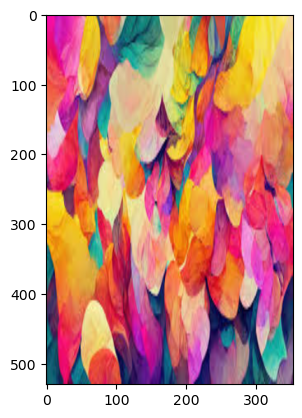

In [18]:
plt.imshow(img)
plt.show()

In [19]:
img.shape

(530, 353, 3)

In [22]:
X = img.reshape((-1,3))

In [24]:
X.shape

(187090, 3)

In [26]:
from sklearn.cluster import KMeans

In [27]:
k = 5
model = KMeans(n_clusters=k)

In [28]:
model.fit(X)

C:\Users\ARSHIYA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [29]:
centroids = model.cluster_centers_

In [30]:
print(centroids)

[[223.0722924  187.86351841 148.93686349]
 [201.35034658  75.83977131 151.01487055]
 [ 58.36024975  78.62744219 110.59159348]
 [233.53682687 167.50725162  49.56371345]
 [213.11378908  64.59267525  75.63343996]]


In [31]:
colors = np.array(centroids,dtype='uint8')

In [32]:
print(colors)

[[223 187 148]
 [201  75 151]
 [ 58  78 110]
 [233 167  49]
 [213  64  75]]


In [33]:
# making a color patch

# mat = np.zeros((100,100,3))
# plt.imshow(mat)
# plt.show()

# # MY Code for COLOR PATCH

In [35]:
# making color patch for the dominant colors

# cnt = 1
# for i in range(len(colors)):
#     plt.subplot(1,k,cnt)
#     cnt += 1
#     plt.axis('off')
#     mat = np.zeros((100,100,3),dtype='uint8')
#     r = colors[i][0]
#     g = colors[i][1]
#     b = colors[i][2]

#     mat[:,:,0] = r
#     mat[:,:,1] = g
#     mat[:,:,2] = b

#     plt.imshow(mat)
# plt.show()

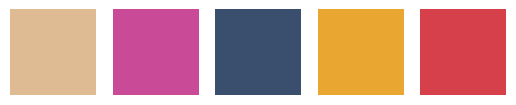

In [36]:
#MAKING COLOR PATCH
cnt = 1
for color in colors:
    plt.subplot(1,k,cnt)
    cnt += 1
    plt.axis('off')
    mat = np.zeros((100,100,3),dtype='uint8')
    mat[:,:,:] = color
    plt.imshow(mat)
    
plt.show()    

In [37]:
print(colors)

[[223 187 148]
 [201  75 151]
 [ 58  78 110]
 [233 167  49]
 [213  64  75]]


# Repainting colors for different values of k

In [41]:
model.labels_

array([1, 1, 1, ..., 2, 2, 2])

In [42]:
np.unique(model.labels_)

array([0, 1, 2, 3, 4])

In [43]:
X.shape

(187090, 3)

In [44]:
newImg = np.zeros((X.shape[0],3),dtype='uint8')
print(newImg.shape)

(187090, 3)


In [45]:
for i in range(newImg.shape[0]):
    newImg[i] = colors[model.labels_[i]]

In [46]:
newImg.resize((530, 353, 3))

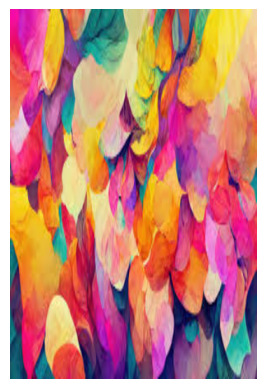

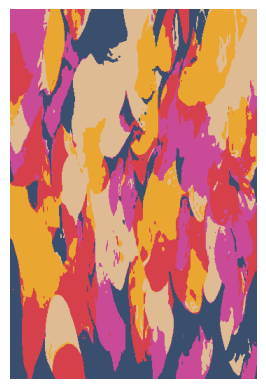

In [47]:
plt.axis('off')
plt.imshow(img)
plt.show()
plt.axis('off')
plt.imshow(newImg)
plt.show()